## 通过固定宽度分箱对计数值进行区间量化

In [1]:
import numpy as np

In [2]:
small_counts = np.random.randint(0, 100, 20)
small_counts

array([43, 13, 38, 23,  8, 77, 60,  8,  0, 79, 99, 46, 42, 61, 64, 43, 46,
       11, 27, 38])

In [3]:
np.floor_divide(small_counts, 10)

array([4, 1, 3, 2, 0, 7, 6, 0, 0, 7, 9, 4, 4, 6, 6, 4, 4, 1, 2, 3])

In [4]:
# 横跨若干数量级的计数值数组
large_counts = [296, 8286, 64011, 80, 3, 725, 867, 2215, 7689, 11495, 91897, 44, 28, 7971, 926, 122, 22222]

In [5]:
# 通过对数函数映射到指数宽度分箱
np.floor(np.log10(large_counts))

array([2., 3., 4., 1., 0., 2., 2., 3., 3., 4., 4., 1., 1., 3., 2., 2., 4.])

### 例 2-5　 通过分位数对计数值进行分箱

In [21]:
import pandas as pd

In [23]:
pd.qcut(large_counts, 4, labels=False)

array([1, 2, 3, 0, 0, 1, 1, 2, 2, 3, 3, 0, 0, 2, 1, 0, 3], dtype=int64)

In [27]:
large_counts_series = pd.Series(large_counts)
large_counts_series.quantile([0.25, 0.5, 0.75])

0.25     122.0
0.50     926.0
0.75    8286.0
dtype: float64

## 例 2-2　 Yelp 数据集中的商家点评数量可视化

In [2]:
import pandas as pd
import json

In [65]:
biz_f = open('data/yelp_dataset/business.json')
biz_df = pd.DataFrame([json.loads(x) for x in biz_f.readlines()])
biz_f.close()

In [4]:
biz_df['review_count'].max()

8348

In [6]:
biz_df.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,2818 E Camino Acequia Drive,{'GoodForKids': 'False'},1SWheh84yJXfytovILXOAQ,"Golf, Active Life",Phoenix,None,0,33.522143,-112.018481,Arizona Biltmore Golf Club,85016,5,3.0,AZ
1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON
2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC
3,"15655 W Roosevelt St, Ste 237",None,xvX2CttrVhyG2z1dFg_0xw,"Insurance, Financial Services",Goodyear,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,33.455613,-112.395596,Farmers Insurance - Paul Lorenz,85338,3,5.0,AZ
4,"4209 Stuart Andrew Blvd, Ste F","{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...",HhyxOkGAM07SRYtlQ4wMFQ,"Plumbing, Shopping, Local Services, Home Servi...",Charlotte,"{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",1,35.190012,-80.887223,Queen City Plumbing,28217,4,4.0,NC


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

Text(0, 0.5, 'Occurrence')

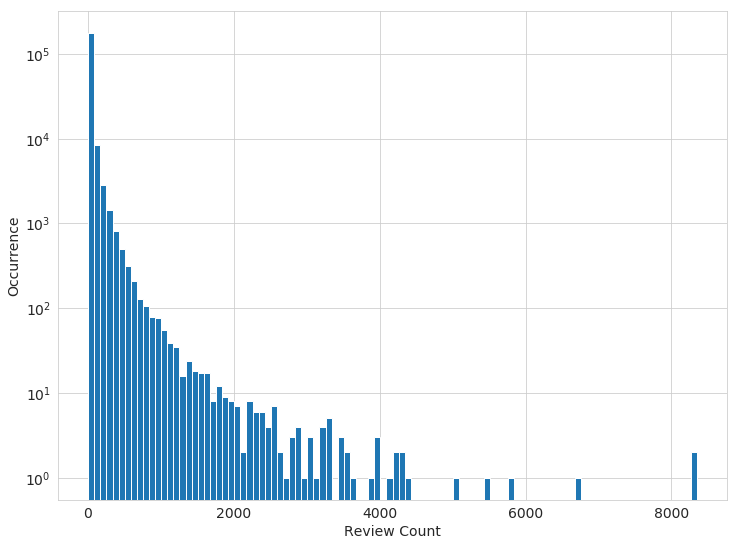

In [29]:
# 绘制点评数据直方图
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(12, 9))
biz_df['review_count'].hist(ax=ax, bins=100)
ax.set_yscale('log')
ax.tick_params(labelsize=14)
ax.set_xlabel('Review Count', fontsize=14)
ax.set_ylabel('Occurrence', fontsize=14)

### 例 2-4　 计算 Yelp 商家点评数量的十分位数

In [17]:
deciles = biz_df['review_count'].quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9])
deciles

0.1     3.0
0.2     4.0
0.3     5.0
0.4     7.0
0.5     9.0
0.6    13.0
0.7    19.0
0.8    33.0
0.9    70.0
Name: review_count, dtype: float64

Text(0, 0.5, 'Occurrence')

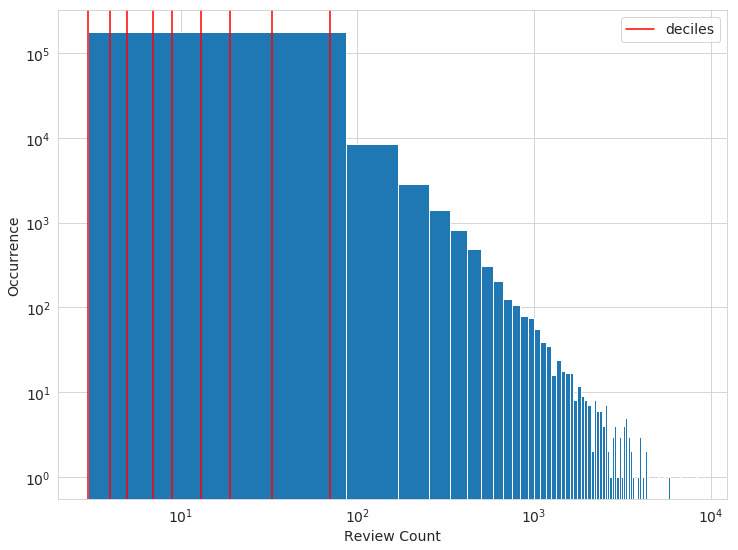

In [32]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(12, 9))
biz_df['review_count'].hist(ax=ax, bins=100)
for pos in deciles:
    handle = plt.axvline(pos, color='r')
ax.legend([handle], ['deciles'], fontsize=14)
ax.set_yscale('log')
ax.set_xscale('log')
ax.tick_params(labelsize=14)
ax.set_xlabel('Review Count', fontsize=14)
ax.set_ylabel('Occurrence', fontsize=14)

# 2.3 对数变换

In [34]:
import numpy as np
y = np.arange(0.00001, 3, 0.01)
x = np.power(10, y)

Text(316.2350475140692, 2.7000100000000002, 'log10(x)')

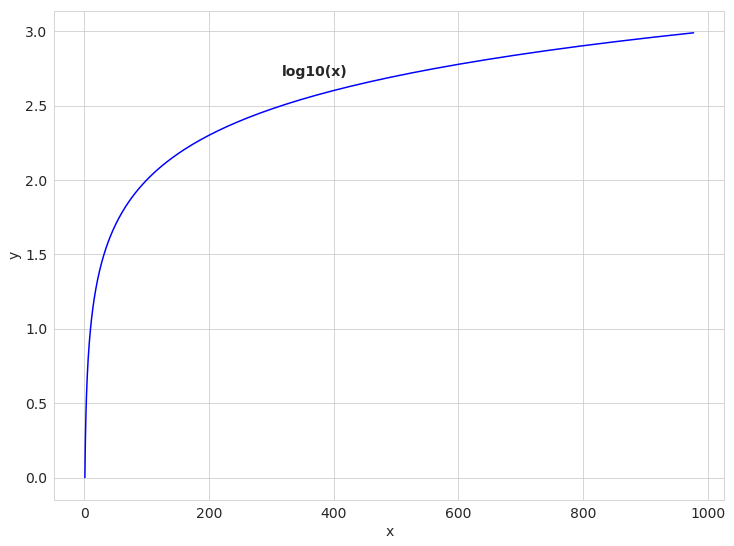

In [49]:
fig, ax = plt.subplots(figsize=(12, 9))
plt.plot(x, y, 'b')
ax.tick_params(labelsize=14)
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.text(x[250], y[250] + 0.2, 'log10(x)', fontsize=14, fontweight='bold')

In [66]:
# 加1 是因为0没有对数
log_review_count = np.log10(biz_df['review_count'] + 1)

Text(0, 0.5, 'Occurrence')

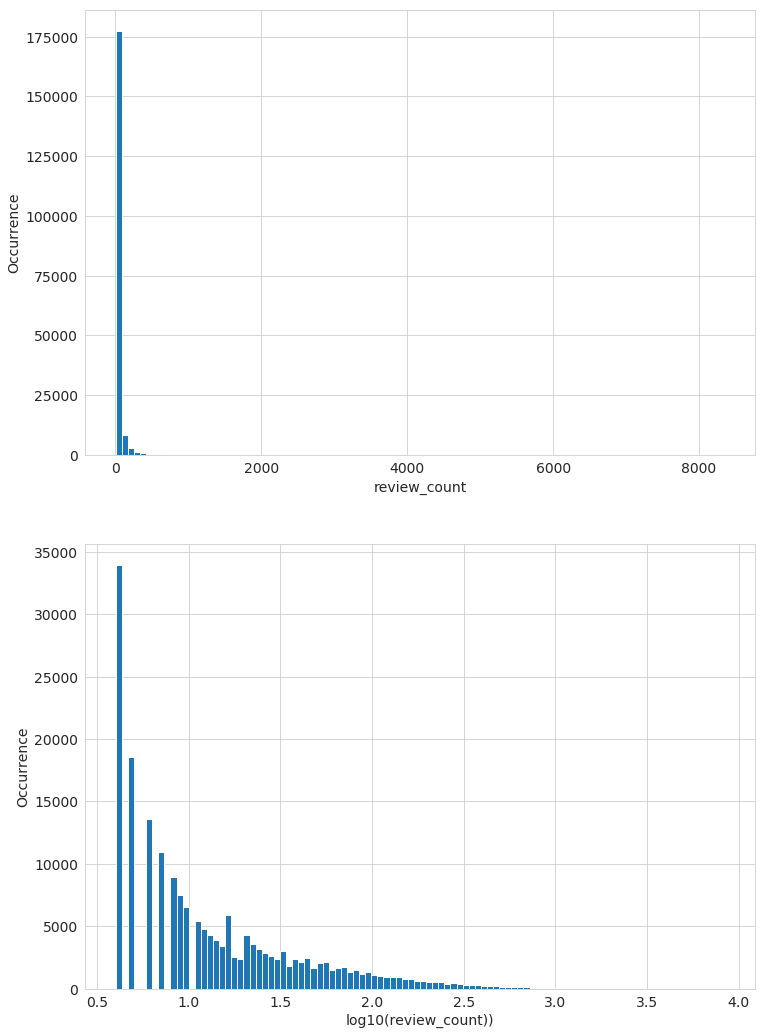

In [56]:
plt.figure(figsize=(12, 18))
ax = plt.subplot(2,1,1)
biz_df['review_count'].hist(ax=ax, bins=100)
ax.tick_params(labelsize=14)
ax.set_xlabel('review_count', fontsize=14)
ax.set_ylabel('Occurrence', fontsize=14)

ax = plt.subplot(2,1,2)
log_review_count.hist(ax=ax, bins=100)
ax.tick_params(labelsize=14)
ax.set_xlabel('log10(review_count))', fontsize=14)
ax.set_ylabel('Occurrence', fontsize=14)

## 线性回归预测

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [67]:
biz_df

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,2818 E Camino Acequia Drive,{'GoodForKids': 'False'},1SWheh84yJXfytovILXOAQ,"Golf, Active Life",Phoenix,None,0,33.522143,-112.018481,Arizona Biltmore Golf Club,85016,5,3.0,AZ
1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON
2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC
3,"15655 W Roosevelt St, Ste 237",None,xvX2CttrVhyG2z1dFg_0xw,"Insurance, Financial Services",Goodyear,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,33.455613,-112.395596,Farmers Insurance - Paul Lorenz,85338,3,5.0,AZ
4,"4209 Stuart Andrew Blvd, Ste F","{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...",HhyxOkGAM07SRYtlQ4wMFQ,"Plumbing, Shopping, Local Services, Home Servi...",Charlotte,"{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",1,35.190012,-80.887223,Queen City Plumbing,28217,4,4.0,NC
5,"Credit Valley Town Plaza, F2 - 6045 Creditview Rd","{'BusinessParking': '{'garage': False, 'street...",68dUKd8_8liJ7in4aWOSEA,"Shipping Centers, Couriers & Delivery Services...",Mississauga,"{'Monday': '9:0-19:0', 'Tuesday': '9:0-20:0', ...",1,43.599475,-79.711584,The UPS Store,L5V 0B1,3,2.5,ON
6,20 Douglas Woods Drive Southeast,"{'RestaurantsPriceRange2': '2', 'BusinessParki...",5JucpCfHZltJh5r1JabjDg,"Beauty & Spas, Hair Salons",Calgary,None,1,50.943646,-114.001828,Edgeworxx Studio,T2Z 1K4,7,3.5,AB
7,"4545 E Tropicana Rd Ste 8, Tropicana","{'RestaurantsPriceRange2': '3', 'GoodForKids':...",gbQN7vr_caG_A1ugSmGhWg,"Hair Salons, Hair Stylists, Barbers, Men's Hai...",Las Vegas,"{'Monday': '10:0-19:0', 'Tuesday': '10:0-19:0'...",1,36.099872,-115.074574,Supercuts,89121,3,3.5,NV
8,5940 W Union Hills Dr,"{'RestaurantsPriceRange2': '2', 'ByAppointment...",Y6iyemLX_oylRpnr38vgMA,"Nail Salons, Beauty & Spas, Day Spas",Glendale,"{'Tuesday': '12:0-18:0', 'Wednesday': '10:0-18...",0,33.654815,-112.188568,Vita Bella Fine Day Spa,85308,8,5.0,AZ
9,21689 Lorain Rd,"{'ByAppointmentOnly': 'False', 'BusinessAccept...",4GBVPIYRvzGh4K4TkRQ_rw,"Beauty & Spas, Nail Salons, Day Spas, Massage",Fairview Park,"{'Tuesday': '9:0-21:0', 'Wednesday': '9:0-21:0...",1,41.440825,-81.854097,Options Salon & Spa,44126,8,4.5,OH


In [71]:
biz_df['log_review_count'] = np.log(biz_df['review_count'] + 1)

In [104]:
biz_train, biz_validate = train_test_split(biz_df, test_size=0.2)
y_train = biz_train['stars'].values.reshape(-1, 1)
y_test = biz_validate['stars'].values.reshape(-1, 1)

In [105]:
m1 = LinearRegression()
m1.fit(biz_train[['log_review_count']], y_train)
m2 = LinearRegression()
m2.fit(biz_train[['review_count']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [106]:
print("Residual sum of squares: %.5f"
      % np.mean((m1.predict(biz_validate[['log_review_count']]) - y_test) ** 2))

Residual sum of squares: 1.03223


In [107]:
print("Residual sum of squares: %.5f"
      % np.mean((m2.predict(biz_validate[['review_count']]) - y_test) ** 2))

Residual sum of squares: 1.03431


## Bike Sharing Dataset

In [74]:
bike_df = pd.read_csv('data/bike_sharing/train.csv')
bike_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


<IPython.core.display.Javascript object>


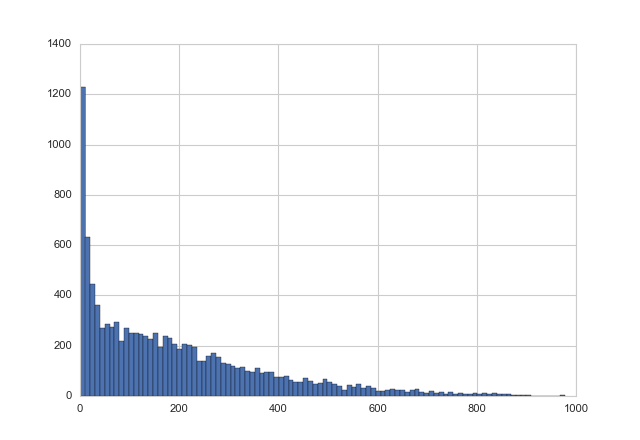

In [76]:
fig, ax = plt.subplots()
bike_df['count'].hist(ax=ax, bins=100)

In [92]:
from sklearn import linear_model
from sklearn import cross_validation

In [86]:
categorical_cols = ['season', 'weather']
bike_df = pd.get_dummies(bike_df, prefix=categorical_cols, columns=categorical_cols)

In [90]:
bike_df

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-01 00:00:00,0,0,9.84,14.395,81,0.0000,3,13,16,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2011-01-01 01:00:00,0,0,9.02,13.635,80,0.0000,8,32,40,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2011-01-01 02:00:00,0,0,9.02,13.635,80,0.0000,5,27,32,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2011-01-01 03:00:00,0,0,9.84,14.395,75,0.0000,3,10,13,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2011-01-01 04:00:00,0,0,9.84,14.395,75,0.0000,0,1,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,2011-01-01 05:00:00,0,0,9.84,12.880,75,6.0032,0,1,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,2011-01-01 06:00:00,0,0,9.02,13.635,80,0.0000,2,0,2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,2011-01-01 07:00:00,0,0,8.20,12.880,86,0.0000,1,2,3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,2011-01-01 08:00:00,0,0,9.84,14.395,75,0.0000,1,7,8,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,2011-01-01 09:00:00,0,0,13.12,17.425,76,0.0000,8,6,14,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [96]:
bike_df['log_count'] = np.log(bike_df['count'])

In [97]:
features = ['holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed',
            'season_1', 'season_2', 'season_3', 'season_4',
            'weather_1', 'weather_2', 'weather_3', 'weather_4']
train, validate = cross_validation.train_test_split(bike_df, test_size=0.2)

In [98]:
validate.shape

(2178, 19)

In [99]:
train.shape

(8708, 19)

In [101]:
lin_model = linear_model.LinearRegression()
lin_model.fit(train[features], train['count'])
log_lin_model = linear_model.LinearRegression()
log_lin_model.fit(train[features], train['log_count'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [104]:
# The sum of squares of the log residual errors
print("Log residual sum of squares: %.2f"
      % np.mean((np.log(1+lin_model.predict(validate[features])) - np.log(1+validate['count'])) ** 2))

Log residual sum of squares: 1.75


In [106]:
# The sum of squares of the log residual errors
print("Log residual sum of squares: %.2f"
      % np.mean((np.log(1+np.exp(log_lin_model.predict(validate[features]))) - np.log(1+validate['count'])) ** 2))

Residual sum of squares: 1.39


## Kaggle loan data

In [107]:
loan_df = pd.read_csv('data/Kaggle loan/loan.csv')

C:\Users\Lemon\Anaconda3\envs\mfe\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [133]:
loan_df.ix[:, range(20)]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc
0,1077501,1296599,5000.0,5000.0,4975.000000,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...
1,1077430,1314167,2500.0,2500.0,2500.000000,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...
2,1077175,1313524,2400.0,2400.0,2400.000000,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN
3,1076863,1277178,10000.0,10000.0,10000.000000,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...
4,1075358,1311748,3000.0,3000.0,3000.000000,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.00,Source Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...
5,1075269,1311441,5000.0,5000.0,5000.000000,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.00,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN
6,1069639,1304742,7000.0,7000.0,7000.000000,60 months,15.96,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.00,Not Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/18/11 > I am planning o...
7,1072053,1288686,3000.0,3000.0,3000.000000,36 months,18.64,109.43,E,E1,MKC Accounting,9 years,RENT,48000.00,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/16/11 > Downpayment for...
8,1071795,1306957,5600.0,5600.0,5600.000000,60 months,21.28,152.39,F,F2,NaN,4 years,OWN,40000.00,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I own a small h...
9,1071570,1306721,5375.0,5375.0,5350.000000,60 months,12.69,121.45,B,B5,Starbucks,< 1 year,RENT,15000.00,Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/16/11 > I'm trying to b...


In [135]:
loan_df.ix[:, range(20,40)]

,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv
0,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.70,9.0,f,0.00,0.00,5861.071414,5831.78
1,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.40,4.0,f,0.00,0.00,1008.710000,1008.71
2,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.50,10.0,f,0.00,0.00,3003.653644,3003.65
3,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.00,37.0,f,0.00,0.00,12226.302212,12226.30
4,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.90,38.0,f,766.90,766.90,3242.170000,3242.17
5,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0.0,Nov-2004,3.0,NaN,NaN,9.0,0.0,7963.0,28.30,12.0,f,0.00,0.00,5631.377753,5631.38
6,debt_consolidation,Loan,280xx,NC,23.51,0.0,Jul-2005,1.0,NaN,NaN,7.0,0.0,17726.0,85.60,11.0,f,1889.15,1889.15,8136.840000,8136.84
7,car,Car Downpayment,900xx,CA,5.35,0.0,Jan-2007,2.0,NaN,NaN,4.0,0.0,8221.0,87.50,4.0,f,0.00,0.00,3938.144334,3938.14
8,small_business,Expand Business & Buy Debt Portfolio,958xx,CA,5.55,0.0,Apr-2004,2.0,NaN,NaN,11.0,0.0,5210.0,32.60,13.0,f,0.00,0.00,646.020000,646.02
9,other,Building my credit history.,774xx,TX,18.08,0.0,Sep-2004,0.0,NaN,NaN,2.0,0.0,9279.0,36.50,3.0,f,0.00,0.00,1476.190000,1469.34


In [138]:
loan_df.ix[:, range(40,60)]

,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m
0,5000.00,861.07,0.00,0.00,0.0000,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1,456.46,435.17,0.00,117.08,1.1100,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2,2400.00,603.65,0.00,0.00,0.0000,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN
3,10000.00,2209.33,16.97,0.00,0.0000,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4,2233.10,1009.07,0.00,0.00,0.0000,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN
5,5000.00,631.38,0.00,0.00,0.0000,Jan-2015,161.03,NaN,Sep-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN
6,5110.85,3025.99,0.00,0.00,0.0000,Jan-2016,170.08,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN
7,3000.00,938.14,0.00,0.00,0.0000,Jan-2015,111.34,NaN,Dec-2014,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8,162.02,294.94,0.00,189.06,2.0900,Apr-2012,152.39,NaN,Aug-2012,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN
9,673.48,533.42,0.00,269.29,2.5200,Nov-2012,121.45,NaN,Mar-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [142]:
loan_df.ix[:, range(60, 74)]

,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>


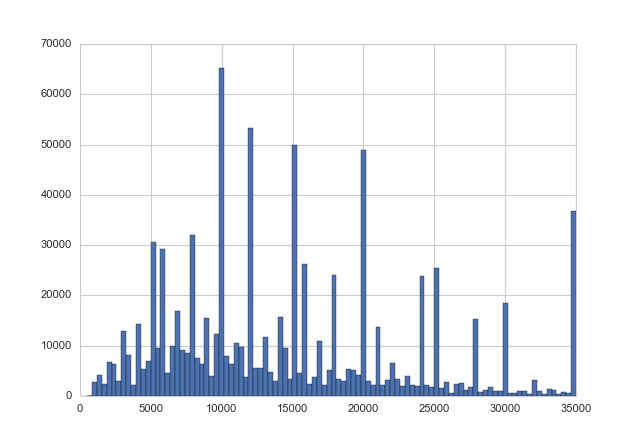

In [134]:
plt.figure()
loan_df['loan_amnt'].hist(bins=100)